<a href="https://colab.research.google.com/github/UddhavParab/SVM---Prediction-if-a-customer-subscribe-to-trem-or-not/blob/main/SVM_Term_Deposit_Subsscription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
  
  
uploaded = files.upload()

In [7]:
import os



import pandas as pd
pd.set_option('display.max_column',None)


import warnings
warnings.filterwarnings('ignore')


import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from pydotplus import graph_from_dot_data
from IPython.display import Image
from numpy import absolute
from pandas import read_csv


import sklearn
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
import graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn import model_selection
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR

get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
import pandas as pd
import io
  
df = pd.read_csv('bank-additional-full.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# **Understanding** **Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Value Count Of All Columns

In [5]:
pieces = []
for col in df.columns:
    tmp_series = df[col].value_counts()
    tmp_series.name = col
    pieces.append(tmp_series)
    
df_value_counts = pd.concat(pieces, axis=1)

pieces

[31    1947
 32    1846
 33    1833
 36    1780
 35    1759
       ... 
 89       2
 91       2
 94       1
 87       1
 95       1
 Name: age, Length: 78, dtype: int64, admin.           10422
 blue-collar       9254
 technician        6743
 services          3969
 management        2924
 retired           1720
 entrepreneur      1456
 self-employed     1421
 housemaid         1060
 unemployed        1014
 student            875
 unknown            330
 Name: job, dtype: int64, married     24928
 single      11568
 divorced     4612
 unknown        80
 Name: marital, dtype: int64, university.degree      12168
 high.school             9515
 basic.9y                6045
 professional.course     5243
 basic.4y                4176
 basic.6y                2292
 unknown                 1731
 illiterate                18
 Name: education, dtype: int64, no         32588
 unknown     8597
 yes            3
 Name: default, dtype: int64, yes        21576
 no         18622
 unknown      990
 Name

# Visualization

## **Continious Variables**

### Distribution Plot

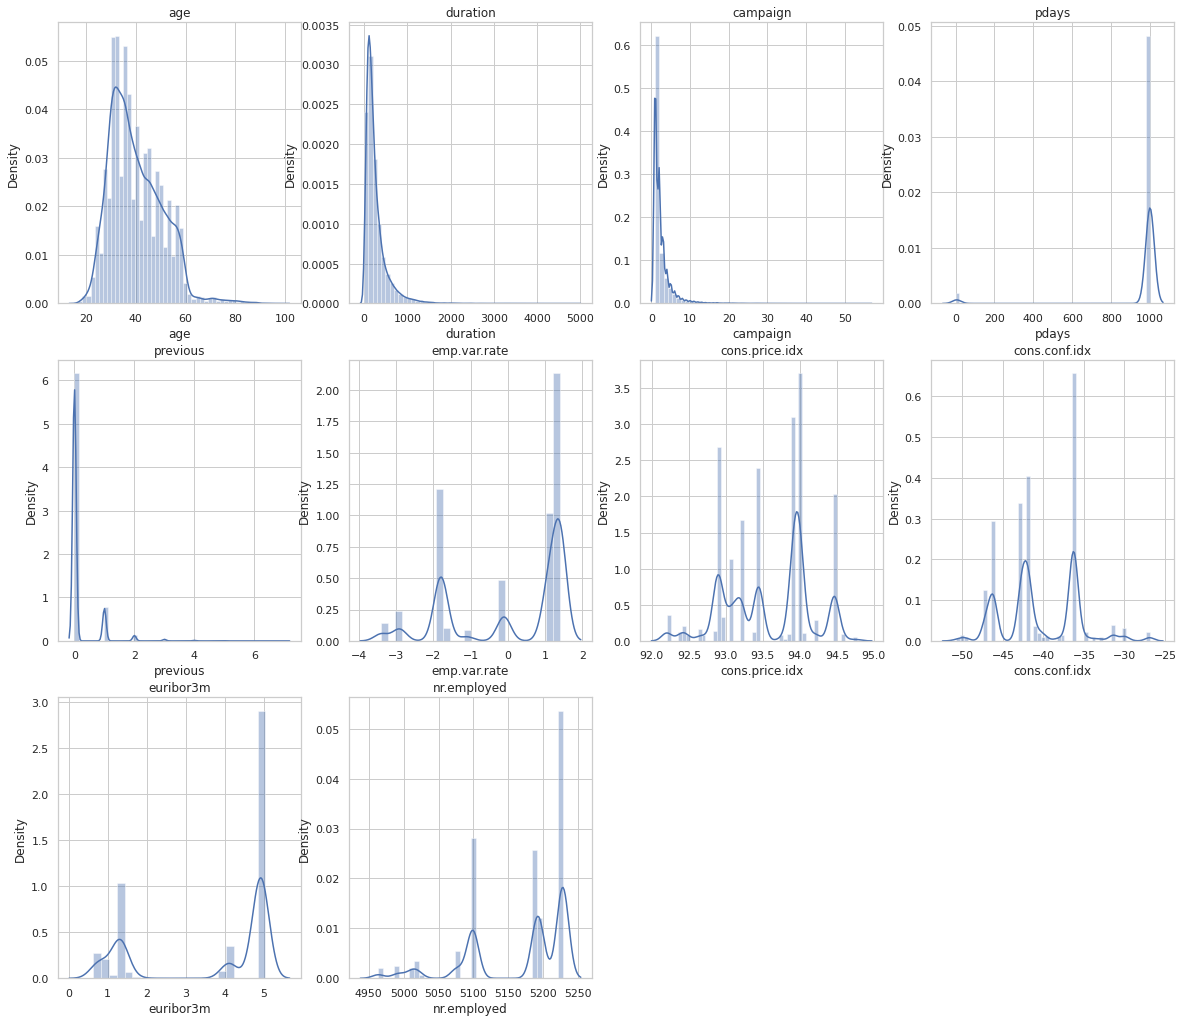

In [8]:
col_dict = {'age':1, 'duration':2, 'campaign':3, 'pdays':4,'previous':5, 'emp.var.rate':6,'cons.price.idx':7,
            'cons.conf.idx':8, 'euribor3m':9, 'nr.employed':10}

plt.figure(figsize = (20,30))

for columns,i in col_dict.items():
                     plt.subplot(5,4,i)
                     sns.distplot(df[columns])
                     plt.title(columns)

plt.show()

### Box Plot

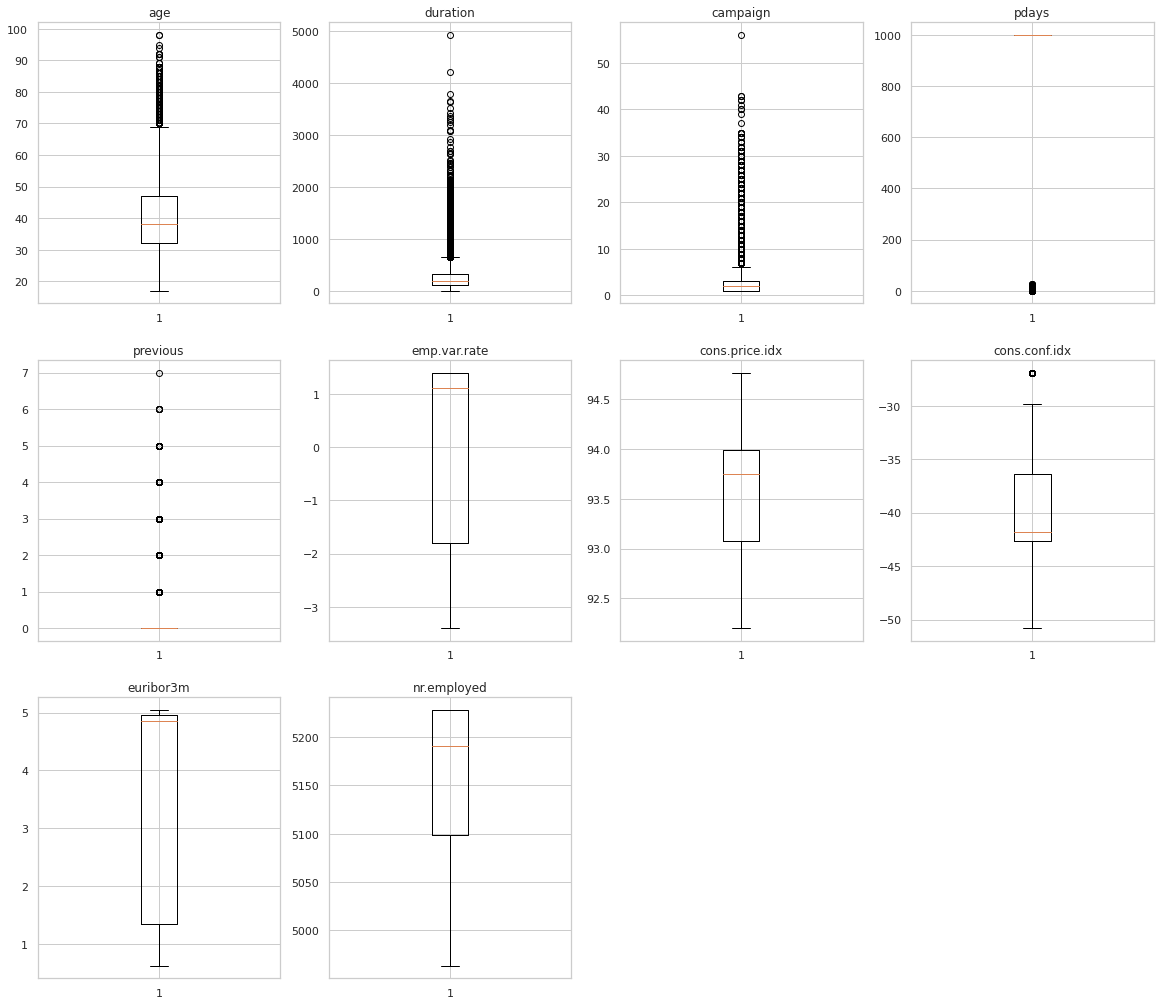

In [9]:
col_dict = {'age':1, 'duration':2, 'campaign':3, 'pdays':4,'previous':5, 'emp.var.rate':6,'cons.price.idx':7,
            'cons.conf.idx':8, 'euribor3m':9, 'nr.employed':10}

plt.figure(figsize = (20,30))

for columns,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[columns])
                     plt.title(columns)

plt.show()

### Comparison Continious Vs Target

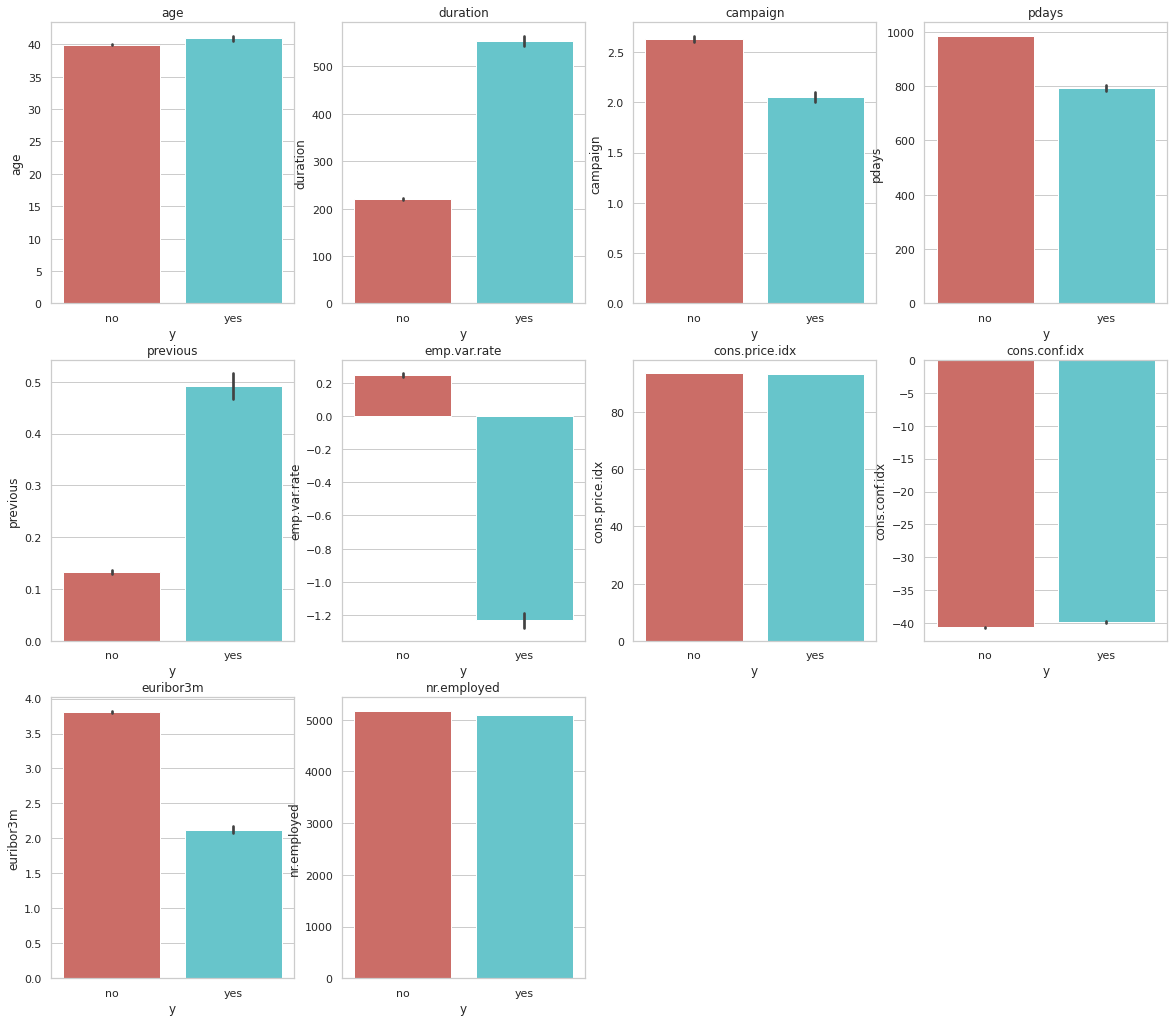

In [10]:
col_dict = {'age':1, 'duration':2, 'campaign':3, 'pdays':4,'previous':5, 'emp.var.rate':6,'cons.price.idx':7,
            'cons.conf.idx':8, 'euribor3m':9, 'nr.employed':10}

plt.figure(figsize = (20,30))

for columns,i in col_dict.items():
                     plt.subplot(5,4,i)
                     sns.barplot(x='y', y=df[columns], data=df, palette='hls')
                     plt.title(columns)

plt.show()

# **Categorical Variables**

### Count Plot

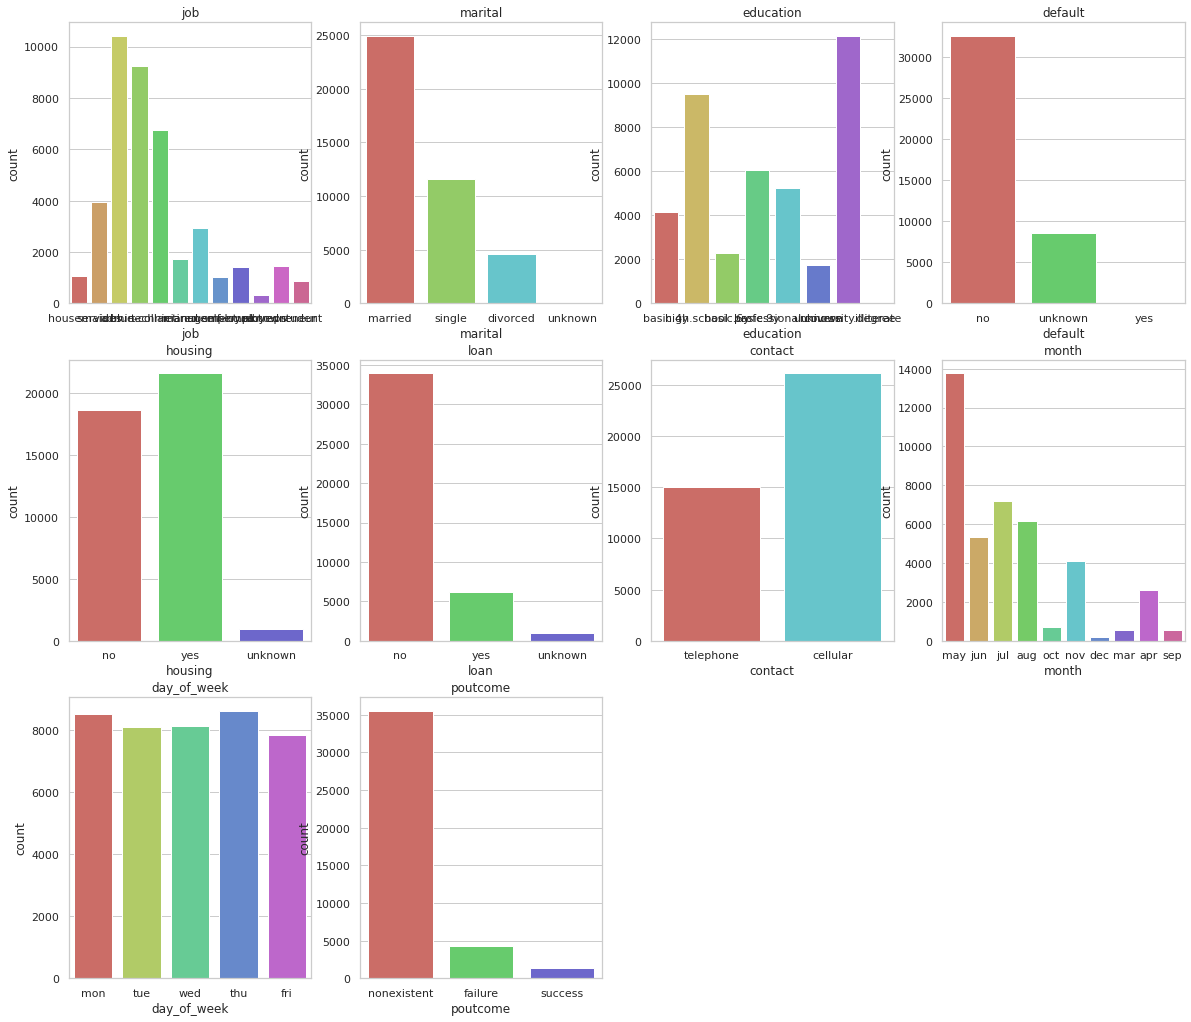

In [11]:
col_dict = {'job':1, 'marital':2, 'education':3, 'default':4, 'housing':5, 'loan':6, 'contact':7, 'month':8, 'day_of_week':9,
            'poutcome':10}

plt.figure(figsize = (20,30))

for columns,i in col_dict.items():
                     plt.subplot(5,4,i)
                     sns.countplot(df[columns], palette='hls')
                     plt.title(columns)

plt.show()

### Comparison Categorical Vs Target

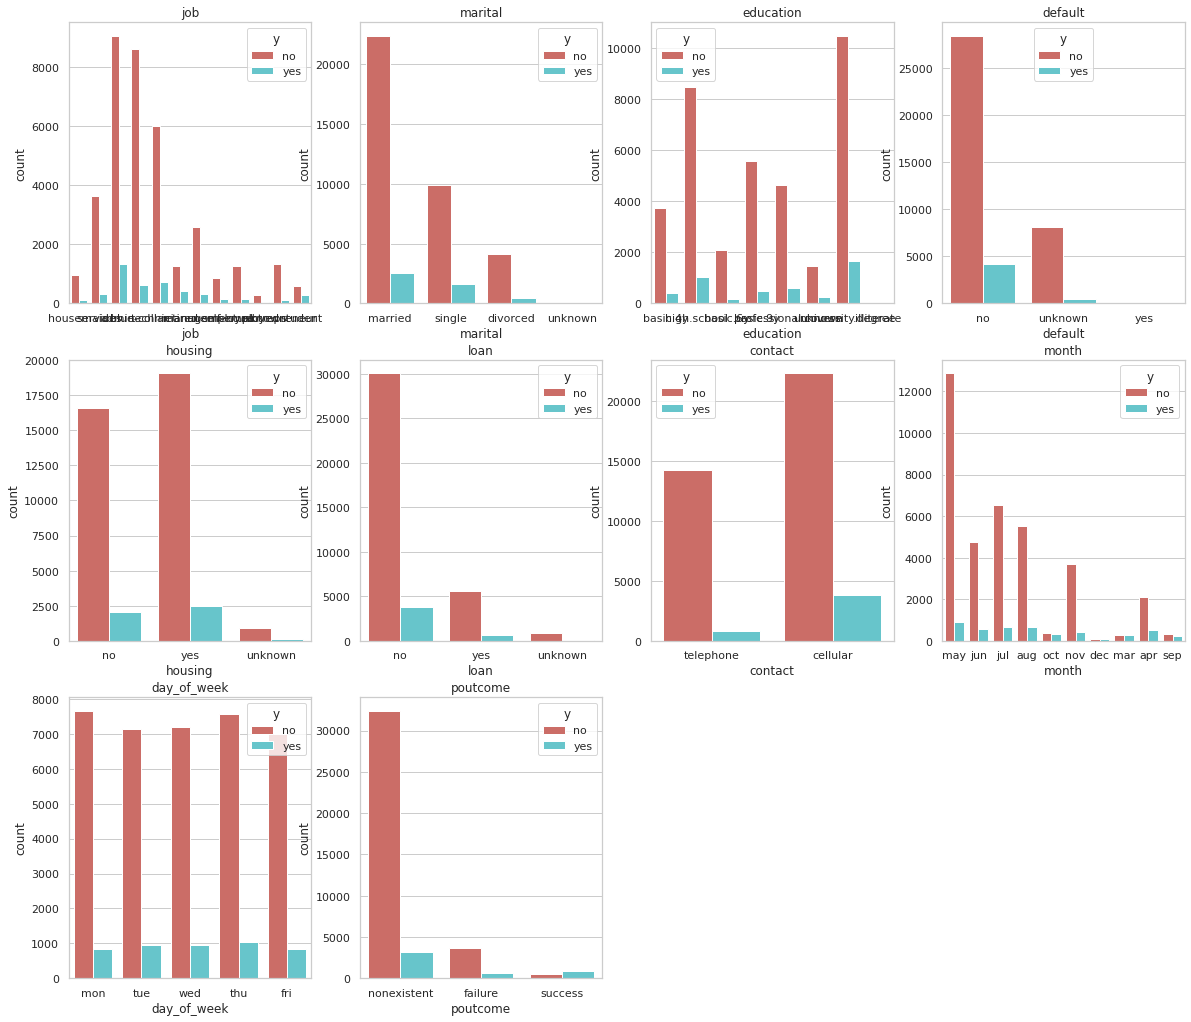

In [12]:
col_dict = {'job':1, 'marital':2, 'education':3, 'default':4, 'housing':5, 'loan':6, 'contact':7, 'month':8, 'day_of_week':9,
            'poutcome':10}

plt.figure(figsize = (20,30))

for columns,i in col_dict.items():
                     plt.subplot(5,4,i)
                     sns.countplot(x=df[columns], hue='y', data=df, palette='hls')
                     plt.title(columns)

plt.show()

# Data Pre Processing

# Pipeline

### Categorical Pipeline

In [13]:
categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

### Continious Pipeline

In [14]:
numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)

# Columns Seperation

In [15]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

### Dropping Target Out of Categorical Columns

In [16]:
categorical_data.drop(columns=['y'],axis=1, inplace=True)
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
dtypes: object(10)
memory usage: 3.1+ MB


In [17]:
from sklearn.compose import make_column_selector

cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']

num = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [18]:
cat_cols = cat
num_cols = num

## Treating Target Variable

In [19]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [20]:
df.y.replace('no',0, inplace=True)
df.y.replace('yes',1, inplace=True)

In [21]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

# Implementing Pipeline

In [22]:
full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),
    ]
)

# **Model** **Building**

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [24]:
x = df.iloc[:, 0:20]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [25]:
y = df.y
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

# Implementing Pipeline On X

In [26]:
x = full_processor.fit_transform(x)

# SMOTE for Target Imbalance

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [28]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 3244
Before OverSampling, counts of label '0': 25587 

After OverSampling, the shape of train_X: (51174, 63)
After OverSampling, the shape of train_y: (51174,) 

After OverSampling, counts of label '1': 25587
After OverSampling, counts of label '0': 25587


# Model Implementation

In [29]:
svcT = svm.SVC(kernel = 'linear', C = 1, gamma = 'auto', probability = True).fit(x_train_res, y_train_res)

### Prediction

In [30]:
y_predSVM = svcT.predict(x_test)

In [31]:
y_predSVM

array([0, 0, 0, ..., 1, 1, 0])

### Confusion Matrix

In [32]:
cm_tree = pd.crosstab(y_test,y_predSVM,rownames = ['Actual'],colnames=['Predicted'],margins = True)
cm_tree

Predicted,0,1,All
Actual,,,
0,9176,1785,10961
1,113,1283,1396
All,9289,3068,12357


### Classification Report

In [34]:
print(classification_report(y_test,y_predSVM))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     10961
           1       0.42      0.92      0.57      1396

    accuracy                           0.85     12357
   macro avg       0.70      0.88      0.74     12357
weighted avg       0.92      0.85      0.87     12357



### Accuracy

In [35]:
accuracy_score(y_test,y_predSVM)

0.846402848587845